In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/category_price.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
df.Category_name.unique()

array(['mount, tv, stand', 'speaker, portable, bluetooth',
       'computer, charger, laptop', 'sound, speaker, home',
       'remote, control, tv', 'memory, computer, component',
       'security, surveillance, camera', 'headphone, earbud, ear',
       'drive, storage, internal', 'surge, power',
       'car, speaker, subwoofer', 'power, battery, cell',
       'speaker, ceiling, wall', 'projector, presentation, mount',
       'case, keyboard, tablet', 'switch, hub, networking', 'camera, bag',
       'tv, television, video', 'tablet, ipad, computer',
       'receiver, amplifier, home', 'screen, projector, projection',
       'speaker, subwoofer, separate', 'radio, portable, satellite',
       'car, receiver, dash', 'headset, game, computer',
       'cable, tv, theater', 'speaker, wireless, audio',
       'shelf, tabletop, audio', 'speaker, audio, home',
       'player, home, audio', 'camcorder, camera, action',
       'adapter, networking, usb', 'car, camera, dash',
       'drive, stora

In [20]:
df1 = df[df['Category_name']=='tablet, ipad, computer']

In [21]:
df1.name.unique()

array(['Apple - Pre-Owned iPad 3 - 64GB - Black',
       'Apple - Pre-Owned iPad 3 - 32GB - White',
       'Wacom CS610PK Bamboo Sketch',
       'Apple - Pre-Owned iPad mini 4 - 16GB - Space gray',
       'Apple - iPad mini 4 Wi-Fi + Cellular 128GB - Sprint - Silver',
       'Details About Microsoft Surface Pen Burgundy (2017) #eyu00025 New Sealed In Box',
       'Samsung Galaxy Tab E Lite 7 8gb White - Sm-T113nykaxar',
       'Amazon - Kindle Voyage - 6 - 4GB - Black"',
       '9.7 iPad (2017, 32GB, Wi-Fi Only, Silver)',
       'Details About Microsoft Surface Pen Stylus W/ Tip Kit For Surface Pro 3',
       'Apple - iPad Pro 12.9-inch (Latest Model) with Wi-Fi + Cellular - 512 GB - Gold',
       'Details About Brand New In Box Wacom Bamboo Ink Cs321ak Smart Stylus Pen Black',
       '7.0 Tab A 8GB Tablet (Wi-Fi Only, Black)',
       'Samsung Galaxy Tab E Lite Kids 7; 8 GB Wifi Tablet (White) SM-T113NDWACCC"',
       'Apple - Pre-owned 9.7-inch iPad Pro - 128GB - Space gray',
       '

In [23]:
### sample inmputation 
#impressions per month
test1 = df1.groupby(['name', 'Week_Number']).agg({'disc_price': 'mean' ,'Date_imp': 'count' }).reset_index()

In [24]:
x_pivot = test1.pivot(index='Week_Number', columns='name' ,values='disc_price')

In [25]:
x_values = pd.DataFrame(x_pivot.to_records())
x_values.fillna(method='ffill', inplace=True)
x_values[:2]

,Week_Number,"7.0 Tab A 8GB Tablet (Wi-Fi Only, Black)","9.7 iPad (2017, 32GB, Wi-Fi Only, Silver)","Amazon - Kindle Voyage - 6 - 4GB - Black""",Apple - Pre-Owned iPad 3 - 32GB - White,Apple - Pre-Owned iPad 3 - 64GB - Black,Apple - Pre-Owned iPad mini 4 - 16GB - Space gray,Apple - Pre-owned 9.7-inch iPad Pro - 128GB - Space gray,Apple - Pre-owned 9.7-inch iPad Pro - 32GB - Space gray,Apple - iPad Pro 12.9-inch (Latest Model) with Wi-Fi + Cellular - 512 GB - Gold,Apple - iPad mini 4 Wi-Fi + Cellular 128GB - Sprint - Silver,Details About Brand New In Box Wacom Bamboo Ink Cs321ak Smart Stylus Pen Black,Details About Microsoft Surface Pen Burgundy (2017) #eyu00025 New Sealed In Box,Details About Microsoft Surface Pen Stylus W/ Tip Kit For Surface Pro 3,Samsung Galaxy Tab E Lite 7 8gb White - Sm-T113nykaxar,"Samsung Galaxy Tab E Lite Kids 7; 8 GB Wifi Tablet (White) SM-T113NDWACCC""",Wacom CS610PK Bamboo Sketch
0,9,NaN,NaN,199.99,279.99,299.99,NaN,717.912857,NaN,NaN,729.99,NaN,NaN,54.24,NaN,NaN,NaN
1,10,NaN,NaN,179.99,549.99,649.99,NaN,606.948000,NaN,NaN,30.42,NaN,NaN,48.49,NaN,NaN,NaN


In [45]:
x_values.columns[1:]

Index(['7.0 Tab A 8GB Tablet (Wi-Fi Only, Black)',
       '9.7 iPad (2017, 32GB, Wi-Fi Only, Silver)',
       'Amazon - Kindle Voyage - 6 - 4GB - Black"',
       'Apple - Pre-Owned iPad 3 - 32GB - White',
       'Apple - Pre-Owned iPad 3 - 64GB - Black',
       'Apple - Pre-Owned iPad mini 4 - 16GB - Space gray',
       'Apple - Pre-owned 9.7-inch iPad Pro - 128GB - Space gray',
       'Apple - Pre-owned 9.7-inch iPad Pro - 32GB - Space gray',
       'Apple - iPad Pro 12.9-inch (Latest Model) with Wi-Fi + Cellular - 512 GB - Gold',
       'Apple - iPad mini 4 Wi-Fi + Cellular 128GB - Sprint - Silver',
       'Details About Brand New In Box Wacom Bamboo Ink Cs321ak Smart Stylus Pen Black',
       'Details About Microsoft Surface Pen Burgundy (2017) #eyu00025 New Sealed In Box',
       'Details About Microsoft Surface Pen Stylus W/ Tip Kit For Surface Pro 3',
       'Samsung Galaxy Tab E Lite 7 8gb White - Sm-T113nykaxar',
       'Samsung Galaxy Tab E Lite Kids 7; 8 GB Wifi Tablet (White

In [26]:
y_pivot = test1.pivot(index='Week_Number', columns='name', values='Date_imp')
y_values = pd.DataFrame(y_pivot.to_records())
y_values.fillna(method='ffill', inplace=True)
y_values[:2]

,Week_Number,"7.0 Tab A 8GB Tablet (Wi-Fi Only, Black)","9.7 iPad (2017, 32GB, Wi-Fi Only, Silver)","Amazon - Kindle Voyage - 6 - 4GB - Black""",Apple - Pre-Owned iPad 3 - 32GB - White,Apple - Pre-Owned iPad 3 - 64GB - Black,Apple - Pre-Owned iPad mini 4 - 16GB - Space gray,Apple - Pre-owned 9.7-inch iPad Pro - 128GB - Space gray,Apple - Pre-owned 9.7-inch iPad Pro - 32GB - Space gray,Apple - iPad Pro 12.9-inch (Latest Model) with Wi-Fi + Cellular - 512 GB - Gold,Apple - iPad mini 4 Wi-Fi + Cellular 128GB - Sprint - Silver,Details About Brand New In Box Wacom Bamboo Ink Cs321ak Smart Stylus Pen Black,Details About Microsoft Surface Pen Burgundy (2017) #eyu00025 New Sealed In Box,Details About Microsoft Surface Pen Stylus W/ Tip Kit For Surface Pro 3,Samsung Galaxy Tab E Lite 7 8gb White - Sm-T113nykaxar,"Samsung Galaxy Tab E Lite Kids 7; 8 GB Wifi Tablet (White) SM-T113NDWACCC""",Wacom CS610PK Bamboo Sketch
0,9,NaN,NaN,2.0,2.0,2.0,NaN,7.0,NaN,NaN,2.0,NaN,NaN,4.0,NaN,NaN,NaN
1,10,NaN,NaN,1.0,1.0,1.0,NaN,5.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN


OLS Model for Price Elasticity (this use case is Cross Price as there are multiple products)

In [31]:
points = []
results_values = {
    "name": [],
    "price_elasticity": [],
    "price_mean": [],
    "quantity_mean": [],
    "intercept": [],
    "slope": [],
    "coefficient_pvalue" : [],
    "rsquared": [],
}

for column in x_values.columns[1:]:
    column_points = []
    for i in range(len(x_values[column])):
        if not np.isnan(x_values[column][i]) and not np.isnan(y_values[column][i]):
            column_points.append((x_values[column][i], y_values[column][i]))
    df = pd.DataFrame(list(column_points), columns= ['x_value', 'y_value'])

    #Linear Regression Model
    import statsmodels.api as sm
    x_value = df['x_value']
    y_value = df['y_value']
    X = sm.add_constant(x_value)
    model = sm.OLS(y_value, X)
    result = model.fit()
    
    #(Null Hypothesis test) Coefficient with a p value less than 0.05
    if result.f_pvalue < 0.05:
        
        rsquared = result.rsquared
        coefficient_pvalue = result.f_pvalue
        intercept, slope = result.params
        mean_price = np.mean(x_value)
        mean_quantity = np.mean(y_value)
        
        #Price elasticity Formula
        price_elasticity = (slope)*(mean_price/mean_quantity)
        
        #Append results into dictionary for dataframe
        results_values["name"].append(column)
        results_values["price_elasticity"].append(price_elasticity)
        results_values["price_mean"].append(mean_price)
        results_values["quantity_mean"].append(mean_quantity)
        results_values["intercept"].append(intercept)
        results_values["slope"].append(slope)
        results_values["coefficient_pvalue"].append(coefficient_pvalue)
        results_values["rsquared"].append(rsquared)
        
final_df = pd.DataFrame.from_dict(results_values)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


In [32]:
df_elasticity = final_df[['name','price_elasticity','coefficient_pvalue','slope','price_mean','quantity_mean','intercept','rsquared']]

In [33]:
## Price Elasticity Null Hypothesis Testing
print("Null Hypothesis Rejected:", len(df_elasticity), "out of", len(set(test1['name'])) )

Null Hypothesis Rejected: 4 out of 16


In [34]:
def divergent_plot(df, values_column, ylabel, xlabel):

    #Divergent plot
    df['ranking'] = df[values_column].rank( ascending = True).astype(int)
    df.sort_values(values_column, ascending =False, inplace = True)
    plt.figure(figsize = (12,5), dpi = 80)
    plt.hlines(y = df['ranking'] , xmin = 0, xmax = df[values_column], alpha = 0.5, linewidth = 3)
    
    #Add elasticity labels
    for x, y, tex in zip(df[values_column], df['ranking'] , df[values_column]):
        plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':10})
        
    
    # Axis and title
    plt.gca().set(ylabel= ylabel, xlabel= xlabel)
    plt.yticks(df['ranking'])
    plt.title(values_column , fontdict={'size':13})
    plt.grid(linestyle='--', alpha=0.5)
    plt.show()
            
    
    #Adjust Ranking column and print dataframe
    cols = list(df.columns)
    cols = [cols[-1]] + cols[:-1]
    df = df[cols]
    
    df = df.iloc[:,:3]
    df.set_index('ranking', inplace=True)
    display(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


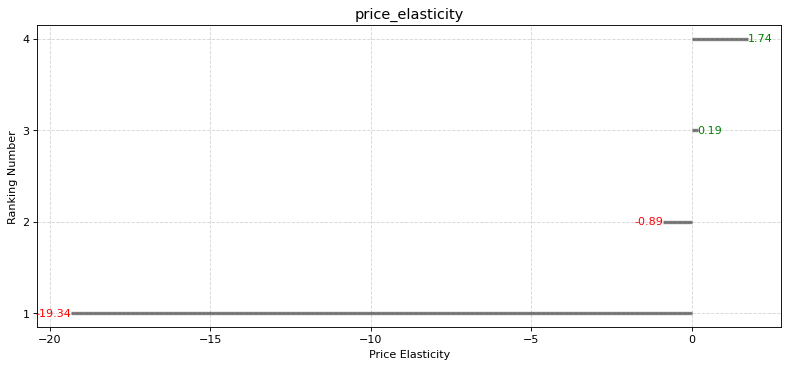

,name,price_elasticity
ranking,,
4,Details About Microsoft Surface Pen Stylus W/ ...,1.741480
3,Apple - iPad mini 4 Wi-Fi + Cellular 128GB - S...,0.187310
2,Samsung Galaxy Tab E Lite Kids 7; 8 GB Wifi Ta...,-0.885184
1,Wacom CS610PK Bamboo Sketch,-19.336067


In [35]:
pe_plot = divergent_plot(df_elasticity, 'price_elasticity', 'Ranking Number', 'Price Elasticity')

In [46]:
## Cross price elasticity function

def crossprice_(df_x, df_y, column_name):
    import statsmodels.api as sm
    
    #grab all X_values
    new_df = df_x.copy()
    #grab y_value with same column name
    new_df['y_value-' + column_name] = df_y[column_name]
    
    multi_xvalues = new_df.loc[:, new_df.columns[1:-1]]
    multi_yvalue = new_df.loc[:, new_df.columns[-1]]
    
    #get price mean values per product
    mean_xvalues = np.mean(multi_xvalues)
    #get mean quantity for y value
    mean_yvalue = np.mean(multi_yvalue)
    
    # Multilinear regression
    X = sm.add_constant(multi_xvalues)
    model = sm.OLS(multi_yvalue, X, missing='drop')
    result = model.fit()
    
    #get results
    results_summary = result.summary()
    print(results_summary)
    #get pvalues of each coefficient
    pvalue = result.pvalues
    
    #transform summary result to a table
    results_as_html = results_summary.tables[1].as_html()
    new_dataframe = pd.read_html(results_as_html, header=0, index_col=0)[0]
    
    #add p value to the table
    new_dataframe['p_value']= pvalue
    
    #set product name as index
    new_dataframe.index.name = 'name'
    new_dataframe.reset_index()
    
    #get each product name price mean
    new_dataframe['mean'] = mean_xvalues
    # execute cross-price formula
    new_dataframe['price_elasticity'] = (new_dataframe.coef) * (new_dataframe['mean'] / mean_yvalue)

    new_dataframe = new_dataframe.reset_index()
    pvalue_significant = new_dataframe['p_value']
    
    #Chech null hypothesis for coefficient or slope value per product
    new_dataframe[column_name+'_CPE'] = np.where((pvalue_significant > .05), 'No effect', new_dataframe['price_elasticity'])
    new_dataframe = new_dataframe.dropna()
    
    return new_dataframe[['name', column_name + '_CPE']]

In [47]:
#append cross-price elasticity into a matrix for analysis
result_df = pd.DataFrame()
for column in x_values.columns[1:]:
    result_df[['name', column + '_CPE']] = crossprice_(x_values, y_values, column)
    result_df = result_df.dropna()
    result_df[column+'_CPE'] = pd.to_numeric(result_df[column+'_CPE'], errors='coerce').fillna(0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


                                           OLS Regression Results                                           
Dep. Variable:     y_value-7.0 Tab A 8GB Tablet (Wi-Fi Only, Black)   R-squared:                       0.967
Model:                                                          OLS   Adj. R-squared:                  0.882
Method:                                               Least Squares   F-statistic:                     11.33
Date:                                              Wed, 10 Aug 2022   Prob (F-statistic):            0.00723
Time:                                                      08:32:21   Log-Likelihood:                -25.621
No. Observations:                                                19   AIC:                             79.24
Df Residuals:                                                     5   BIC:                             92.46
Df Model:                                                        13                                         
Covariance Type:   

In [56]:
result_df = result_df.set_index('name')

In [57]:
result_df

,"7.0 Tab A 8GB Tablet (Wi-Fi Only, Black)_CPE","9.7 iPad (2017, 32GB, Wi-Fi Only, Silver)_CPE","Amazon - Kindle Voyage - 6 - 4GB - Black""_CPE",Apple - Pre-Owned iPad 3 - 32GB - White_CPE,Apple - Pre-Owned iPad 3 - 64GB - Black_CPE,Apple - Pre-Owned iPad mini 4 - 16GB - Space gray_CPE,Apple - Pre-owned 9.7-inch iPad Pro - 128GB - Space gray_CPE,Apple - Pre-owned 9.7-inch iPad Pro - 32GB - Space gray_CPE,Apple - iPad Pro 12.9-inch (Latest Model) with Wi-Fi + Cellular - 512 GB - Gold_CPE,Apple - iPad mini 4 Wi-Fi + Cellular 128GB - Sprint - Silver_CPE,Details About Brand New In Box Wacom Bamboo Ink Cs321ak Smart Stylus Pen Black_CPE,Details About Microsoft Surface Pen Burgundy (2017) #eyu00025 New Sealed In Box_CPE,Details About Microsoft Surface Pen Stylus W/ Tip Kit For Surface Pro 3_CPE,Samsung Galaxy Tab E Lite 7 8gb White - Sm-T113nykaxar_CPE,"Samsung Galaxy Tab E Lite Kids 7; 8 GB Wifi Tablet (White) SM-T113NDWACCC""_CPE",Wacom CS610PK Bamboo Sketch_CPE
name,,,,,,,,,,,,,,,,
"7.0 Tab A 8GB Tablet (Wi-Fi Only, Black)",-3.910072,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.573362,0.000000,0.000000
"9.7 iPad (2017, 32GB, Wi-Fi Only, Silver)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.842089,17.710377,0.000000,0.000000,0.000000,-17.885803,12.363998,0.000000,0.000000,0.000000
"Amazon - Kindle Voyage - 6 - 4GB - Black""",215.091753,0.000000,0.000000,0.000000,0.000000,0.000000,134.383163,99.457870,0.000000,0.000000,0.000000,0.000000,0.000000,103.662013,0.000000,0.000000
Apple - Pre-Owned iPad 3 - 32GB - White,0.000000,0.000000,0.000000,0.248909,15.321492,0.255823,-27.749420,-43.767718,0.000000,0.000000,0.255823,0.000000,0.000000,0.000000,0.000000,0.000000
Apple - Pre-Owned iPad 3 - 64GB - Black,0.000000,0.000000,0.000000,0.316205,18.435683,0.324988,-33.385683,-52.648056,0.000000,0.000000,0.324988,0.000000,0.000000,0.000000,0.000000,0.000000
Apple - Pre-Owned iPad mini 4 - 16GB - Space gray,0.000000,0.000000,0.000000,0.467012,27.882765,0.479985,-50.492628,-79.622655,0.000000,0.000000,0.479985,0.000000,0.000000,0.000000,0.000000,0.000000
Apple - Pre-owned 9.7-inch iPad Pro - 128GB - Space gray,0.000000,0.000000,-1.672589,0.000000,0.000000,0.000000,-1.896642,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apple - Pre-owned 9.7-inch iPad Pro - 32GB - Space gray,5.647836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.218470,0.000000,0.000000
Apple - iPad Pro 12.9-inch (Latest Model) with Wi-Fi + Cellular - 512 GB - Gold,0.000000,-23.817602,9.513704,0.000000,0.000000,0.000000,0.000000,0.000000,-36.710470,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [70]:
test_largest = result_df.nlargest(3,result_df.columns[1])[[result_df.columns[1]]]
test_smallest = result_df.nsmallest(3,result_df.columns[1])[[result_df.columns[1]]]
frames = [test_smallest, test_largest]

result = pd.concat(frames).reset_index()

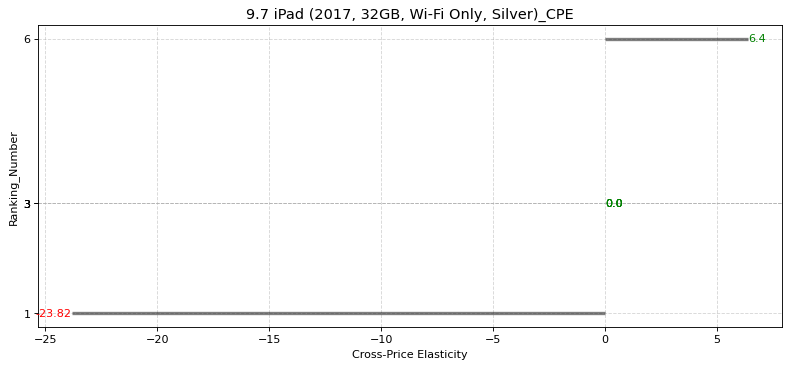

,name,"9.7 iPad (2017, 32GB, Wi-Fi Only, Silver)_CPE"
ranking,,
6,Samsung Galaxy Tab E Lite 7 8gb White - Sm-T11...,6.396743
3,"7.0 Tab A 8GB Tablet (Wi-Fi Only, Black)",0.000000
3,"9.7 iPad (2017, 32GB, Wi-Fi Only, Silver)",0.000000
3,"7.0 Tab A 8GB Tablet (Wi-Fi Only, Black)",0.000000
3,"9.7 iPad (2017, 32GB, Wi-Fi Only, Silver)",0.000000
1,Apple - iPad Pro 12.9-inch (Latest Model) with...,-23.817602


In [71]:
test1000 = divergent_plot(result ,result.columns[1], 'Ranking_Number', 'Cross-Price Elasticity' )

Summary

- if the price of Samsung Galaxy Tab E Lite 7 8gb White increase by 10% , the quantity sold for 9.7 iPad (2017, 32GB, Wi-Fi Only, Silver) will increase by 63.96%
- if the price of Samsung Galaxy Tab E Lite 7 8gb White decrease by 10% , the quantity sold for 9.7 iPad (2017, 32GB, Wi-Fi Only, Silver) will decrease by 63.96%
- if the price of Apple - iPad Pro 12.9-inch (Latest Model) increase by 10%, the the quantity sold for 9.7 iPad (2017, 32GB, Wi-Fi Only, Silver)  will decrease by 238.17%
- if the price of Apple - iPad Pro 12.9-inch (Latest Model) decrease by 10%, the the quantity sold for 9.7 iPad (2017, 32GB, Wi-Fi Only, Silver)  will increase by 238.17%